## Exploratory Analysis


In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

There is 1 csv file in the current version of the dataset:


In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/data.csv


In [3]:
df = pd.read_csv('/kaggle/input/data.csv', delimiter=',')
df.dataframeName = 'data.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')



There are 569 rows and 33 columns


In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# Removing the Unnamed column
df.drop(['Unnamed: 32'], axis=1, inplace=True)
df.shape

(569, 32)

The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [6]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.savefig("dataDist.png", bbox_inches='tight')
    plt.show()


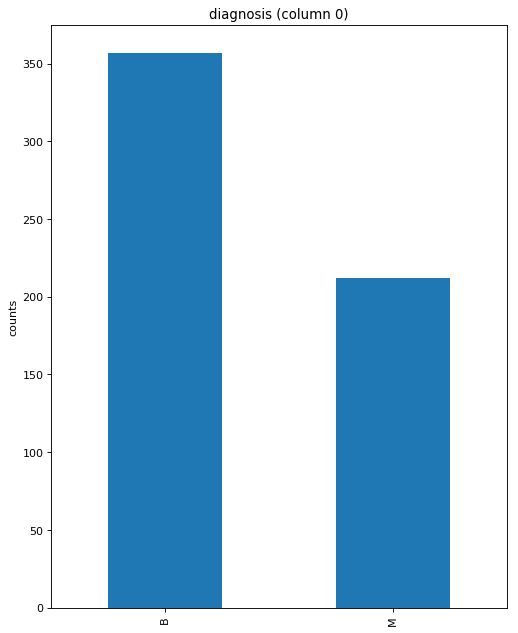

In [7]:

plotPerColumnDistribution(df, 10, 5)


In [8]:
print("Malignant = 1, Benign = 0")
df["diagnosis"]= df["diagnosis"].map(lambda row: 1 if row=='M' else 0)
print("Malignant (diagnosis =1) = {}%".format(round(df["diagnosis"].mean(),3)*100))
                             
print("Benign (diagnosis =0)= {}%".format((1-round(df["diagnosis"].mean(),3))*100))

Malignant = 1, Benign = 0
Malignant (diagnosis =1) = 37.3%
Benign (diagnosis =0)= 62.7%


In [9]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.savefig("correlation.png", bbox_inches='tight')
    plt.show()
    


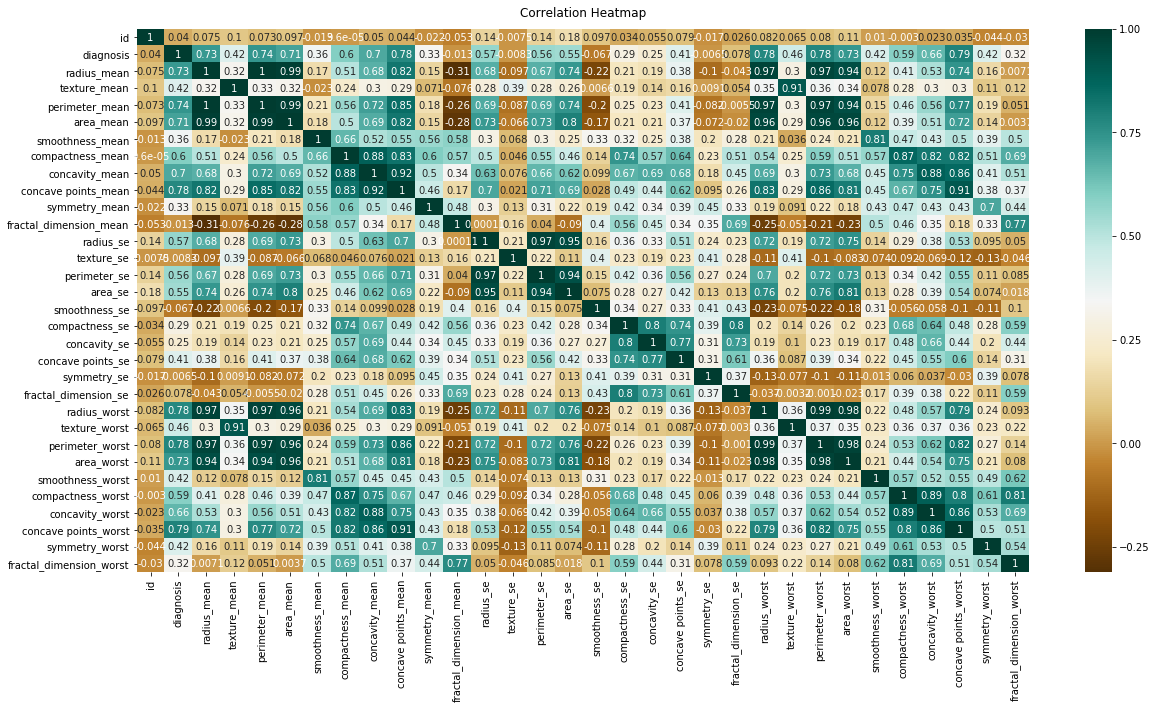

In [10]:

plt.figure(figsize=(20, 10))
heatmap = sb.heatmap(df.corr(),cmap='BrBG',annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


Correlation matrix:

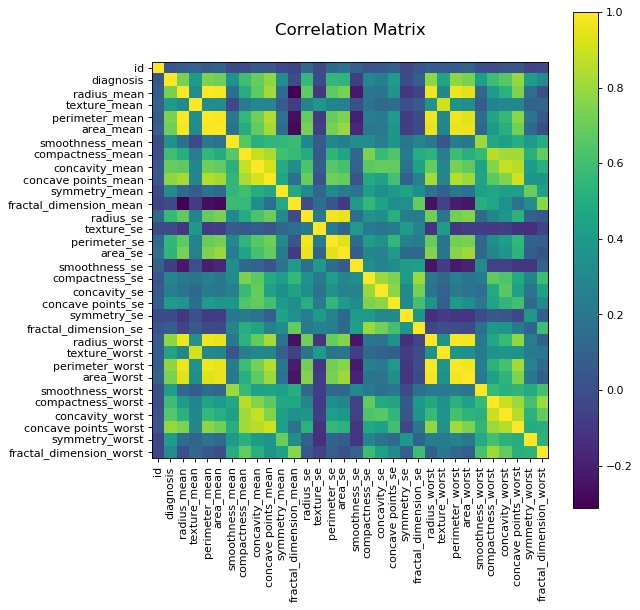

In [11]:
plotCorrelationMatrix(df, 8)

In [12]:
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


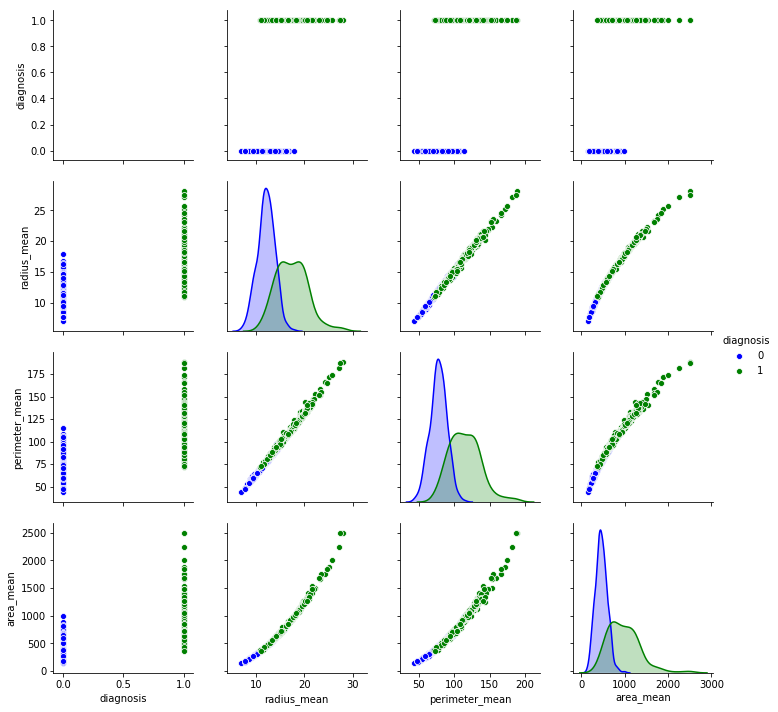

In [13]:


#PAIR PLOTS of mean values
columns_mean=('diagnosis', 'radius_mean','perimeter_mean', 'area_mean')
df_mean = pd.DataFrame(df,columns = columns_mean)

pair_plot = sb.pairplot(df_mean, hue = "diagnosis", diag_kind='kde',palette = ["blue","green"])
# Save the figure
pair_plot.savefig("pair_plot.png")

# Show the plot (optional)
plt.show()


In [14]:
def get_box_dist_plot(x):
    '''This will give a box plot and a distplot one below the other'''
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sb.boxplot(x, ax=ax_box)
    sb.distplot(x, kde= True)

    ax_box.set(yticks=[])
    sb.despine(ax=ax_hist)
    sb.despine(ax=ax_box, left=True)
    plt.show()
    

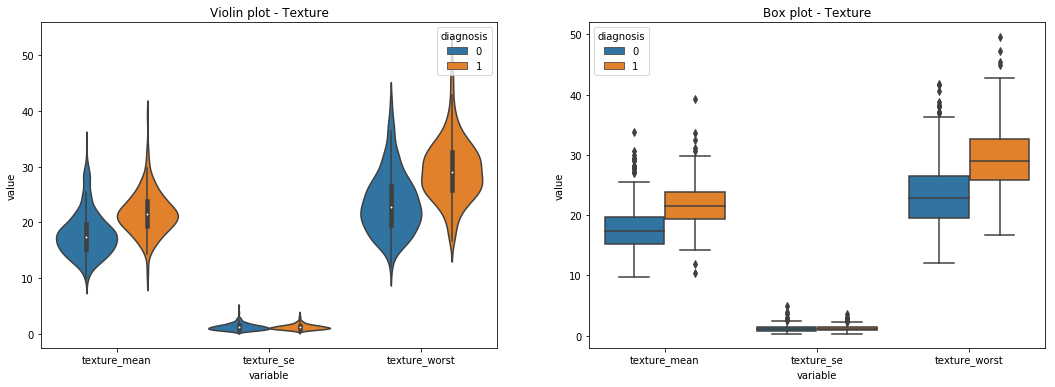

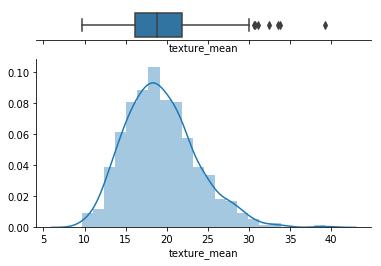

In [15]:
columns_set_4 = ['diagnosis' , 'texture_mean', 'texture_se', 'texture_worst']
df_set_4 = pd.DataFrame(df, columns=columns_set_4)
#df_set_4

fig, axs = plt.subplots(1,2, figsize= (18,6))
sb.violinplot(x= "variable" ,y = "value", hue= "diagnosis", data=pd.melt(df_set_4, id_vars='diagnosis'),scale="width", ax = axs[0])

axs[0].set_title("Violin plot - Texture")
sb.boxplot(x= "variable" ,y = "value", hue= "diagnosis", data=pd.melt(df_set_4, id_vars='diagnosis'), ax = axs[1])
axs[1].set_title("Box plot - Texture")
fig.savefig("box.png")
get_box_dist_plot(df["texture_mean"])

## Pre

In [16]:
X = df.drop(['diagnosis', 'id'], axis=1)
y = df['diagnosis']
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Data Balancing
### Random Oversampling 


In [17]:
from imblearn.over_sampling import RandomOverSampler

# Using RandomOverSampler to oversample the minority class
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

Using TensorFlow backend.


In [18]:
print(len(X), len(y))
print(len(X_resampled), len(y_resampled))

569 569
714 714


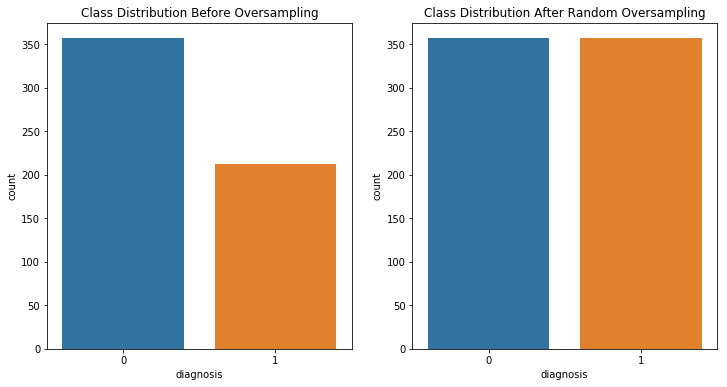

In [19]:
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['diagnosis'] = y_resampled

# Plot the class distribution before and after oversampling
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sb.countplot(x='diagnosis', data=pd.DataFrame(y, columns=['diagnosis']))
plt.title('Class Distribution Before Oversampling')

plt.subplot(1, 2, 2)
sb.countplot(x='diagnosis', data=df_resampled)
plt.title('Class Distribution After Random Oversampling')
plt.savefig("sampled.png")
plt.show()

### Data Set Splitting and Standardization

In [20]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale numerical features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
X_train_scaled

array([[ 0.62572306,  0.52351025,  0.5643164 , ...,  1.06779085,
         0.39989392, -0.47827904],
       [ 1.15358355, -0.29869792,  1.09015228, ...,  1.22754171,
         0.88140115, -0.09225766],
       [-0.60769355, -0.29165042, -0.58987445, ..., -0.37892494,
         0.09688937,  0.15087183],
       ...,
       [-0.13209647, -0.70980201, -0.24146089, ..., -1.39670219,
        -0.73712315, -1.25138815],
       [-0.21310476, -0.05203547, -0.21044036, ...,  0.83339005,
         0.34439309,  1.11059349],
       [-0.6834755 ,  0.15938949, -0.73627624, ..., -0.7848713 ,
        -0.38311784, -0.8472387 ]])